# Лабораторная работа №3
# Разработка сверточных нейронных сетей
## Алексей Жариков

**Для построения и обучения сетей будем использовать библиотеку Keras**

In [0]:
import keras
import time

Using TensorFlow backend.


**Для работы с матрицами будем использовать библиотеку numpy**

In [0]:
import numpy as np

**Для отрисовки различной информации будем использовать библиотеку matplotlib**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  

**Задачу классификации изображений будем рассматривать на наборе данных Fashion MNIST**

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Данный набор состоит из изображений в градации серого различных типов одежды**

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Обучающее множество**

In [0]:
print("Количество изображений в обучающем множестве: {}".format(X_train.shape[0]))
print("Размер изображений: {} x {}".format(X_train.shape[1], X_train.shape[2]))
print("Классы объектов: {}".format(np.unique(y_train)))
for i in np.unique(y_train):
  print("Количество объектов класса {}: {}".format(i, sum(y_train == i)))

Количество изображений в обучающем множестве: 60000
Размер изображений: 28 x 28
Классы объектов: [0 1 2 3 4 5 6 7 8 9]
Количество объектов класса 0: 6000
Количество объектов класса 1: 6000
Количество объектов класса 2: 6000
Количество объектов класса 3: 6000
Количество объектов класса 4: 6000
Количество объектов класса 5: 6000
Количество объектов класса 6: 6000
Количество объектов класса 7: 6000
Количество объектов класса 8: 6000
Количество объектов класса 9: 6000


**Тестовое множество**

In [0]:
print("Количество изображений в тестовом множестве: {}".format(X_test.shape[0]))
for i in np.unique(y_test):
  print("Количество объектов класса {}: {}".format(i, sum(y_test == i)))

Количество изображений в тестовом множестве: 10000
Количество объектов класса 0: 1000
Количество объектов класса 1: 1000
Количество объектов класса 2: 1000
Количество объектов класса 3: 1000
Количество объектов класса 4: 1000
Количество объектов класса 5: 1000
Количество объектов класса 6: 1000
Количество объектов класса 7: 1000
Количество объектов класса 8: 1000
Количество объектов класса 9: 1000


**Пример изображений**

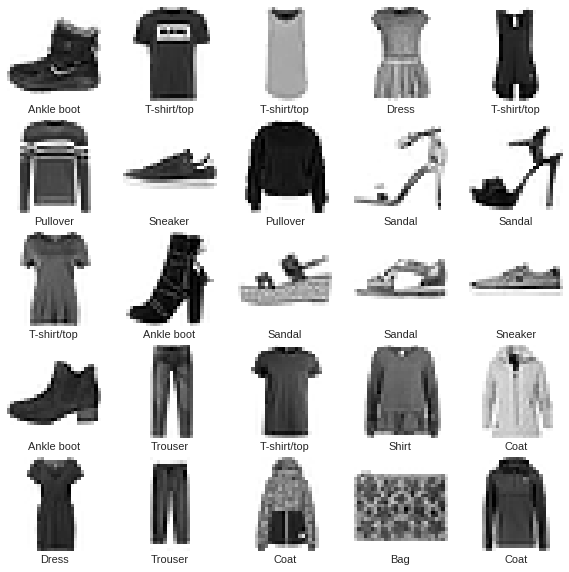

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

**Построение и обучение автоенкодеров**

In [0]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout, Activation, Reshape
from keras.optimizers import SGD
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

Воспользуемся one-hot для кодирования классов изображений

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

Нормализуем в ход в отрезок [0, 1]

In [0]:
minValue = np.min(X_train)
maxValue = np.max(X_train)
X_train = (X_train - minValue) / (maxValue - minValue)
X_test = (X_test - minValue) / (maxValue - minValue)

In [0]:
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

**На выходном слое sigmoid**

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 23s 386us/step - loss: 0.5869 - acc: 0.7850 - val_loss: 0.3985 - val_acc: 0.8550
Epoch 2/3
60000/60000 [==============================] - 18s 301us/step - loss: 0.4025 - acc: 0.8518 - val_loss: 0.3446 - val_acc: 0.8760
Epoch 3/3
60000/60000 [==============================] - 18s 305us/step - loss: 0.3540 - acc: 0.8694 - val_loss: 0.3232 - val_acc: 0.8831
Fit time: %f 70.31006699999999
Eval one image time: %f 0.000109084


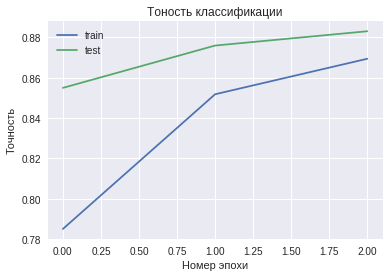

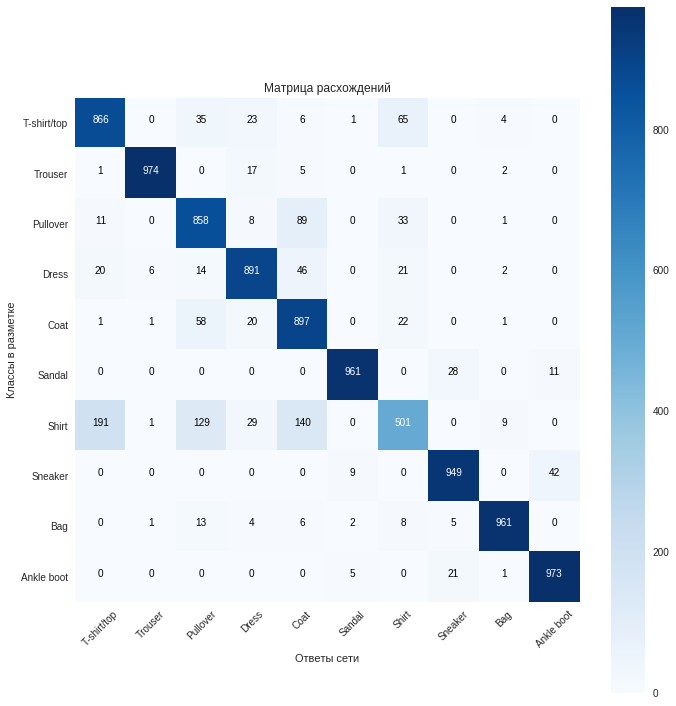

In [0]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
start_time = time.clock()

history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3)

fit_time = time.clock() - start_time
print("Fit time: %f", fit_time)

start_time = time.clock()
score = classifier.evaluate(X_test, y_test, verbose=0)
fit_time = time.clock() - start_time
print("Eval one image time: %f", fit_time/X_test.shape[0])
predicted_classes = classifier.predict_classes(X_test)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


y_pred = classifier.predict(X_test)

import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

plt.figure(figsize=(10, 10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица расхождений")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], 'd'),
           horizontalalignment="center",
           color="white" if cnf_matrix[i, j] > thresh else "black")
plt.grid(False)
plt.ylabel('Классы в разметке')
plt.xlabel('Ответы сети')
plt.tight_layout()
plt.show()

**На выходном слое softmax**

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 20s 338us/step - loss: 0.6843 - acc: 0.7472 - val_loss: 0.4809 - val_acc: 0.8273
Epoch 2/3
60000/60000 [==============================] - 16s 269us/step - loss: 0.4832 - acc: 0.8213 - val_loss: 0.4227 - val_acc: 0.8445
Epoch 3/3
60000/60000 [==============================] - 16s 268us/step - loss: 0.4315 - acc: 0.8409 - val_loss: 0.3793 - val_acc: 0.8573
Fit time: %f 63.614962999999996
Eval one image time: %f 0.00010924109999999985


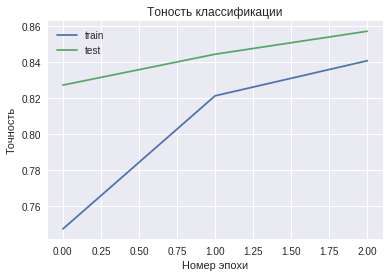

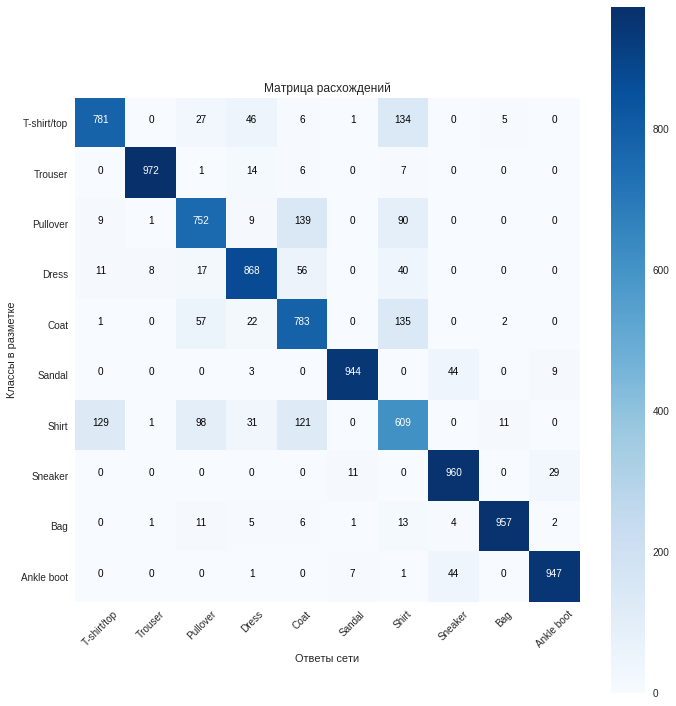

In [0]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start_time = time.clock()

history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3)

fit_time = time.clock() - start_time
print("Fit time: %f", fit_time)

start_time = time.clock()
score = classifier.evaluate(X_test, y_test, verbose=0)
fit_time = time.clock() - start_time
print("Eval one image time: %f", fit_time/X_test.shape[0])

predicted_classes = classifier.predict_classes(X_test)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = classifier.predict(X_test)

import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

plt.figure(figsize=(10, 10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица расхождений")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], 'd'),
           horizontalalignment="center",
           color="white" if cnf_matrix[i, j] > thresh else "black")
plt.grid(False)
plt.ylabel('Классы в разметке')
plt.xlabel('Ответы сети')
plt.tight_layout()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 17s 285us/step - loss: 0.4040 - acc: 0.8492 - val_loss: 0.3537 - val_acc: 0.8690
Epoch 2/3
60000/60000 [==============================] - 17s 278us/step - loss: 0.3796 - acc: 0.8591 - val_loss: 0.3331 - val_acc: 0.8747
Epoch 3/3
60000/60000 [==============================] - 16s 272us/step - loss: 0.3676 - acc: 0.8639 - val_loss: 0.3324 - val_acc: 0.8783
Fit time: %f 62.498446
Eval one image time: %f 0.0001082774999999998


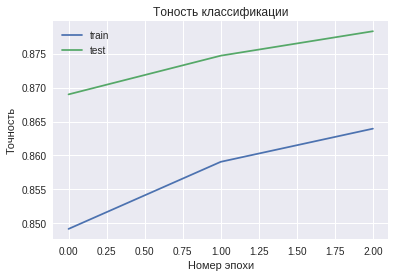

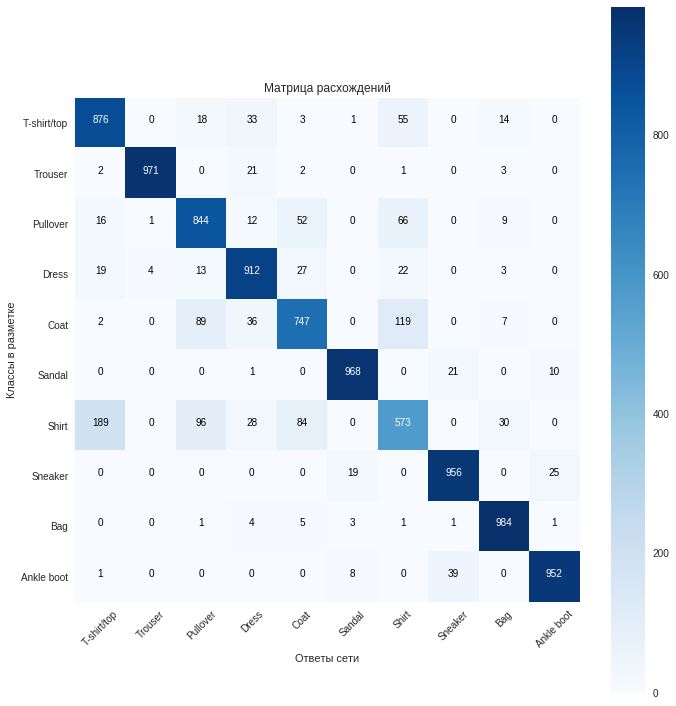

In [0]:
start_time = time.clock()

history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3)

fit_time = time.clock() - start_time
print("Fit time: %f", fit_time)

start_time = time.clock()
score = classifier.evaluate(X_test, y_test, verbose=0)
fit_time = time.clock() - start_time
print("Eval one image time: %f", fit_time/X_test.shape[0])

predicted_classes = classifier.predict_classes(X_test)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = classifier.predict(X_test)

import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

plt.figure(figsize=(10, 10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица расхождений")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], 'd'),
           horizontalalignment="center",
           color="white" if cnf_matrix[i, j] > thresh else "black")
plt.grid(False)
plt.ylabel('Классы в разметке')
plt.xlabel('Ответы сети')
plt.tight_layout()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 16s 271us/step - loss: 0.3553 - acc: 0.8689 - val_loss: 0.3226 - val_acc: 0.8821
Epoch 2/3
60000/60000 [==============================] - 16s 266us/step - loss: 0.3439 - acc: 0.8722 - val_loss: 0.3256 - val_acc: 0.8806
Epoch 3/3
60000/60000 [==============================] - 16s 270us/step - loss: 0.3367 - acc: 0.8735 - val_loss: 0.3016 - val_acc: 0.8892
Fit time: %f 61.79165499999999
Eval one image time: %f 0.00010862209999999948


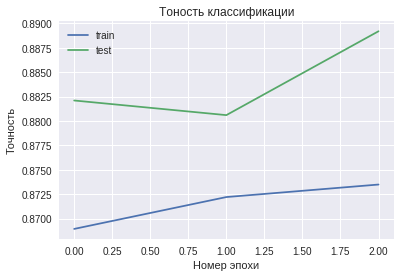

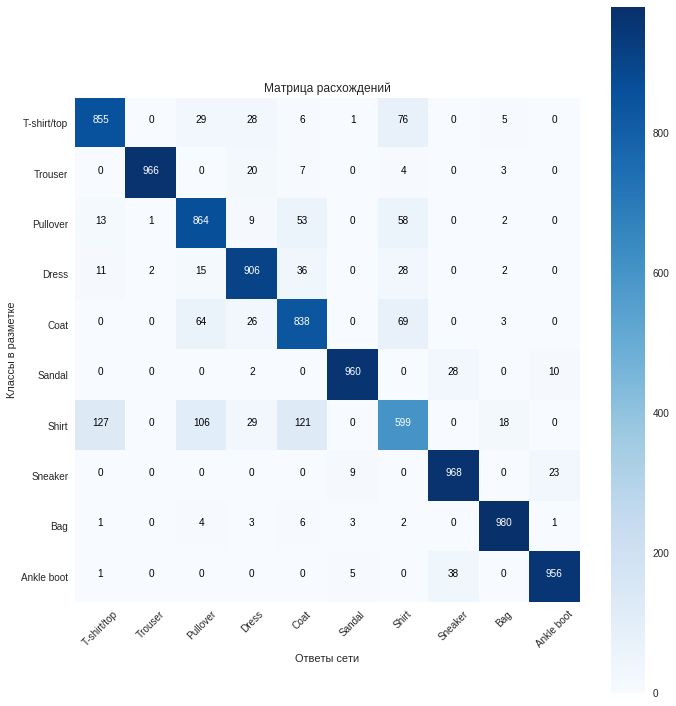

In [0]:
start_time = time.clock()

history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3)

fit_time = time.clock() - start_time
print("Fit time: %f", fit_time)

start_time = time.clock()
score = classifier.evaluate(X_test, y_test, verbose=0)
fit_time = time.clock() - start_time
print("Eval one image time: %f", fit_time/X_test.shape[0])

predicted_classes = classifier.predict_classes(X_test)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = classifier.predict(X_test)

import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

plt.figure(figsize=(10, 10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица расхождений")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], 'd'),
           horizontalalignment="center",
           color="white" if cnf_matrix[i, j] > thresh else "black")
plt.grid(False)
plt.ylabel('Классы в разметке')
plt.xlabel('Ответы сети')
plt.tight_layout()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 21s 349us/step - loss: 0.4552 - acc: 0.8354 - val_loss: 0.3396 - val_acc: 0.8766
Epoch 2/3
60000/60000 [==============================] - 20s 335us/step - loss: 0.3067 - acc: 0.8879 - val_loss: 0.3039 - val_acc: 0.8877
Epoch 3/3
60000/60000 [==============================] - 20s 334us/step - loss: 0.2643 - acc: 0.9027 - val_loss: 0.2776 - val_acc: 0.8984
Fit time: %f 75.104905
Eval one image time: %f 0.00010986719999999935


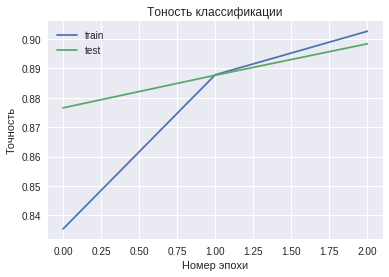

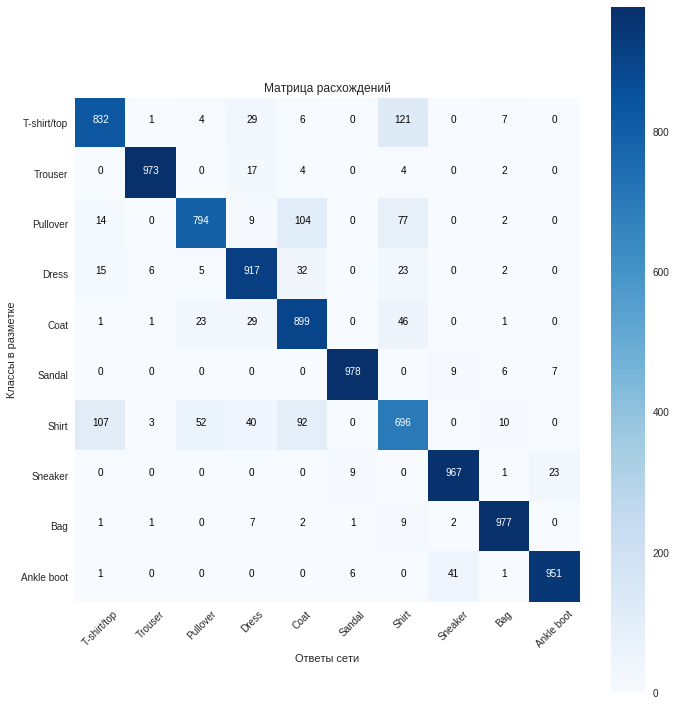

In [0]:
classifier = Sequential()

classifier.add(Conv2D(32, (2, 2), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start_time = time.clock()

history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3)

fit_time = time.clock() - start_time
print("Fit time: %f", fit_time)

start_time = time.clock()
score = classifier.evaluate(X_test, y_test, verbose=0)
fit_time = time.clock() - start_time
print("Eval one image time: %f", fit_time/X_test.shape[0])

predicted_classes = classifier.predict_classes(X_test)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = classifier.predict(X_test)

import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

plt.figure(figsize=(10, 10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица расхождений")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], 'd'),
           horizontalalignment="center",
           color="white" if cnf_matrix[i, j] > thresh else "black")
plt.grid(False)
plt.ylabel('Классы в разметке')
plt.xlabel('Ответы сети')
plt.tight_layout()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 19s 318us/step - loss: 1.2231 - acc: 0.5201 - val_loss: 0.7548 - val_acc: 0.7368
Epoch 2/3
60000/60000 [==============================] - 19s 311us/step - loss: 0.9026 - acc: 0.6558 - val_loss: 0.7114 - val_acc: 0.7464
Epoch 3/3
60000/60000 [==============================] - 19s 309us/step - loss: 0.8291 - acc: 0.6878 - val_loss: 0.6446 - val_acc: 0.7626
Fit time: %f 71.56859400000002
Eval one image time: %f 0.0001141888999999992


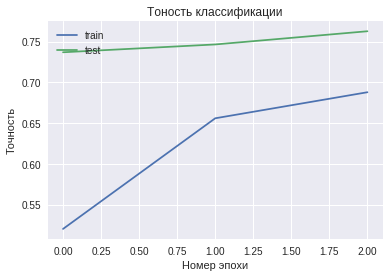

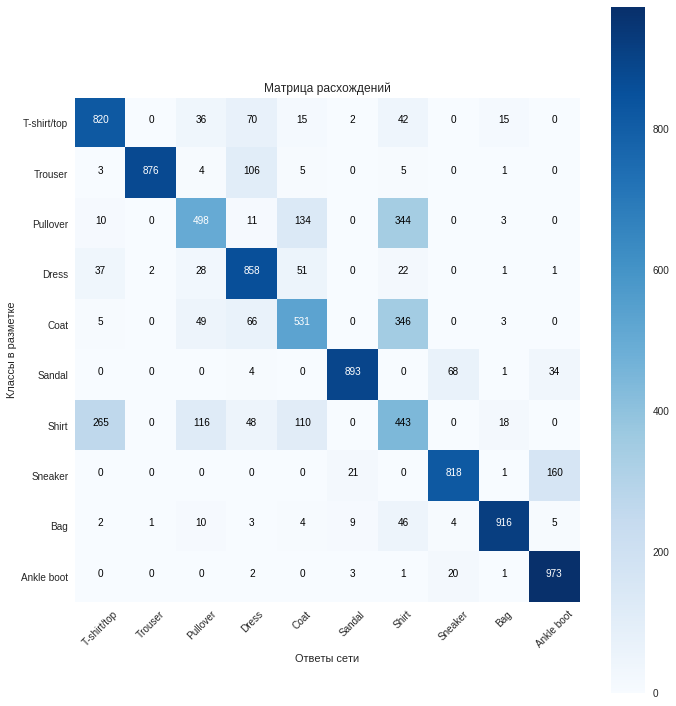

In [0]:
classifier = Sequential()


classifier.add(Conv2D(32, (2, 2), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))
classifier.add(Dropout(0.4))

classifier.add(Conv2D(32, (2, 2), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.6))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

start_time = time.clock()

history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3)

fit_time = time.clock() - start_time
print("Fit time: %f", fit_time)

start_time = time.clock()
score = classifier.evaluate(X_test, y_test, verbose=0)
fit_time = time.clock() - start_time
print("Eval one image time: %f", fit_time/X_test.shape[0])

predicted_classes = classifier.predict_classes(X_test)


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Тоность классификации')
plt.ylabel('Точность')
plt.xlabel('Номер эпохи')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

y_pred = classifier.predict(X_test)

import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))

plt.figure(figsize=(10, 10))
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица расхождений")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, format(cnf_matrix[i, j], 'd'),
           horizontalalignment="center",
           color="white" if cnf_matrix[i, j] > thresh else "black")
plt.grid(False)
plt.ylabel('Классы в разметке')
plt.xlabel('Ответы сети')
plt.tight_layout()
plt.show()